<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/_time_series_forecasting_tesla_stock_data_assignment_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the data
df = pd.read_csv('/content/sample_data/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [ ]:
#Getting an idea about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
#Performing EDA
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
#Summarize the Dataset
df.shape

(253, 7)

In [ ]:
#converting "Date" to date time
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


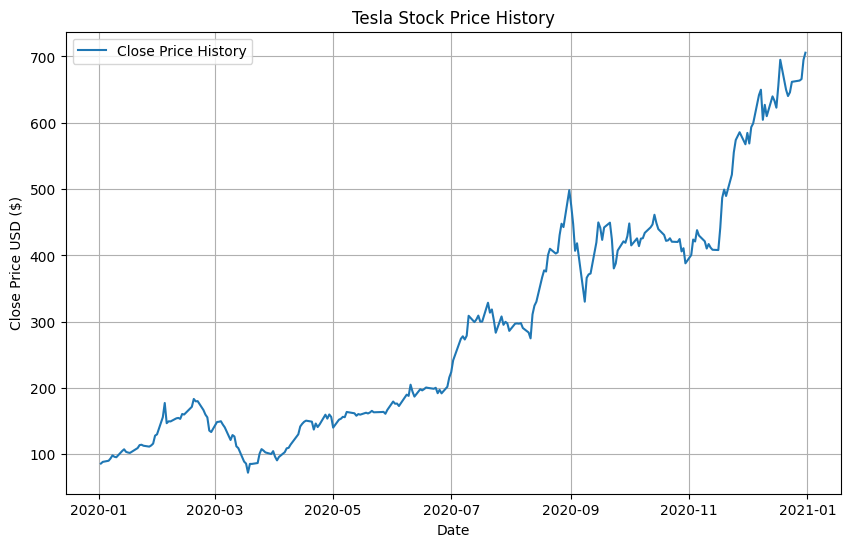

In [ ]:
#Plot
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price History')
plt.title('Tesla Stock Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid()
plt.show()

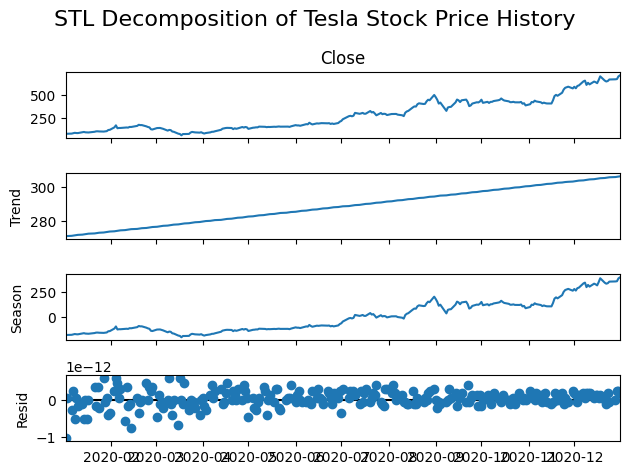

In [ ]:
#STL Decompostion
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Use 'Close' or 'Adj Close' for analysis
series = df['Close']

# Apply STL decomposition (choose period based on suspected seasonality)
stl = STL(series, period=250)
result = stl.fit()

# Plot the decomposition
result.plot()
plt.suptitle("STL Decomposition of Tesla Stock Price History", fontsize=16)
plt.tight_layout()
plt.show()

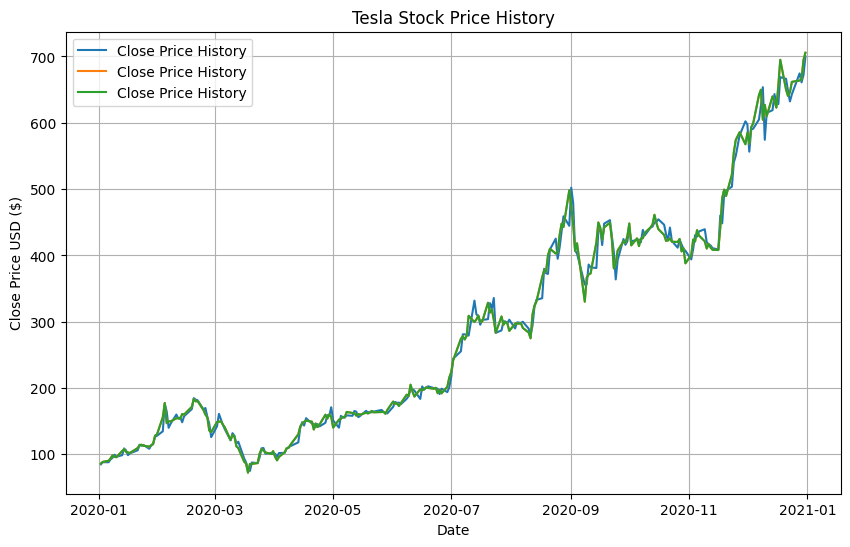

In [ ]:
#plot
plt.figure(figsize=(10,6))
plt.plot(df[['Open', 'Close', 'Adj Close']], label='Close Price History')
plt.title('Tesla Stock Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid()
plt.show()

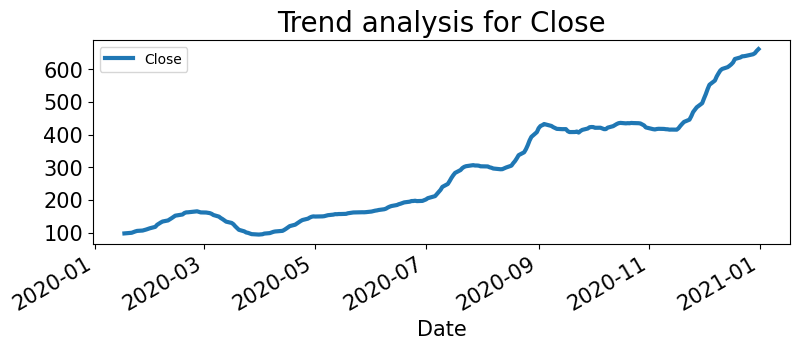

In [ ]:
#Check for trend
close = df[['Close']]
close.rolling(12).mean().plot(figsize = (9,3) , linewidth =3 , fontsize =15)
plt.title('Trend analysis for Close' , fontsize =20)
plt.xlabel('Date' , fontsize =15)
plt.show()

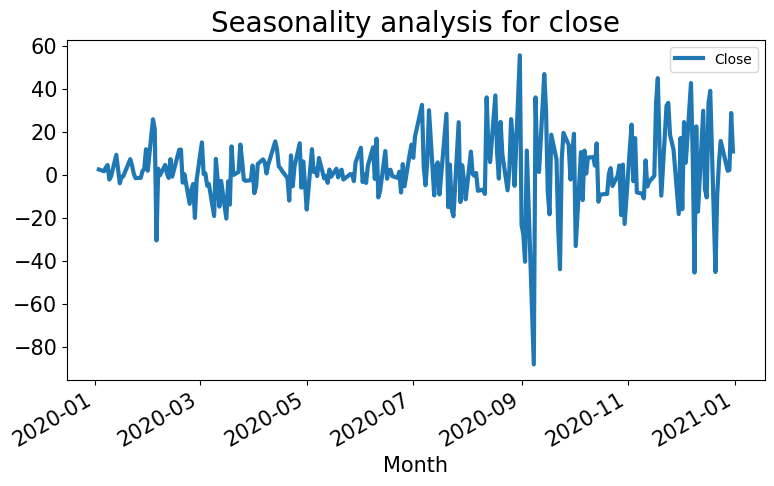

In [ ]:
#Check for seasonality
close.diff().plot(figsize =(9, 5) , linewidth =3 , fontsize =15)
plt.title('Seasonality analysis for close' , fontsize =20)
plt.xlabel('Month' , fontsize =15)
plt.show()

In [ ]:
#ARIMA for close prediction
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(close , order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  253
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1058.309
Date:                Wed, 30 Jul 2025   AIC                           2122.619
Time:                        22:57:19   BIC                           2133.207
Sample:                             0   HQIC                          2126.879
                                - 253                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2192      1.858     -0.118      0.906      -3.861       3.423
ma.L1          0.1941      1.865      0.104      0.917      -3.461       3.850
sigma2       260.1897     13.854     18.781      0.0

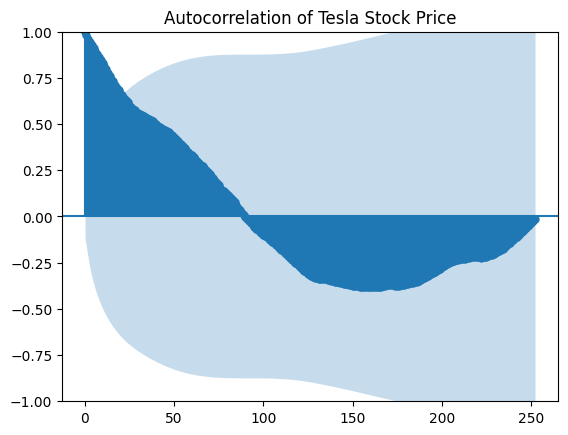

In [ ]:
#ACP plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=252, title="Autocorrelation of Tesla Stock Price")
plt.show()

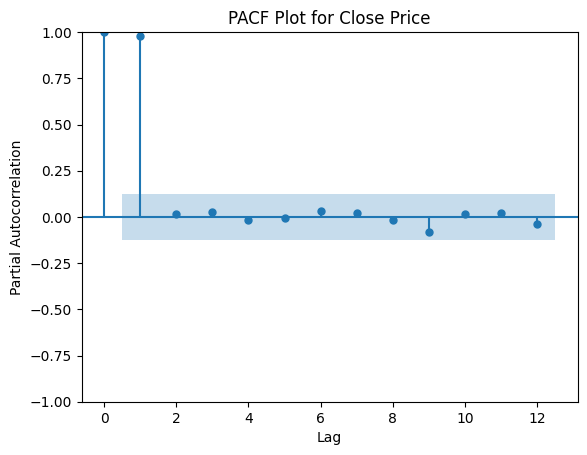

In [ ]:
#PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf

# Pass only the 'Close' column as a Series
plot_pacf(close['Close'], lags=12)
plt.title('PACF Plot for Close Price')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(close['Close'])
print("📉 Augmented Dickey-Fuller Test:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] <= 0.05:
    print("Data is stationary — you can use it directly for ARIMA.")
else:
    print("Data is NOT stationary — you should apply differencing.")

📉 Augmented Dickey-Fuller Test:
ADF Statistic: 0.7978615551167474
p-value: 0.9916015709875191
Data is NOT stationary — you should apply differencing.


In [ ]:
#Fitting the ARIMA Model(Basic)
model_arima = ARIMA(close , order = (1,1,1))
model_arima_fit = model_arima.fit()
print('\nARIMA Model Summary:\n')
print(model_arima_fit.summary())


ARIMA Model Summary:

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  253
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1058.309
Date:                Wed, 30 Jul 2025   AIC                           2122.619
Time:                        22:58:41   BIC                           2133.207
Sample:                             0   HQIC                          2126.879
                                - 253                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2192      1.858     -0.118      0.906      -3.861       3.423
ma.L1          0.1941      1.865      0.104      0.917      -3.461       3.850
sigma2       260.1897     13.

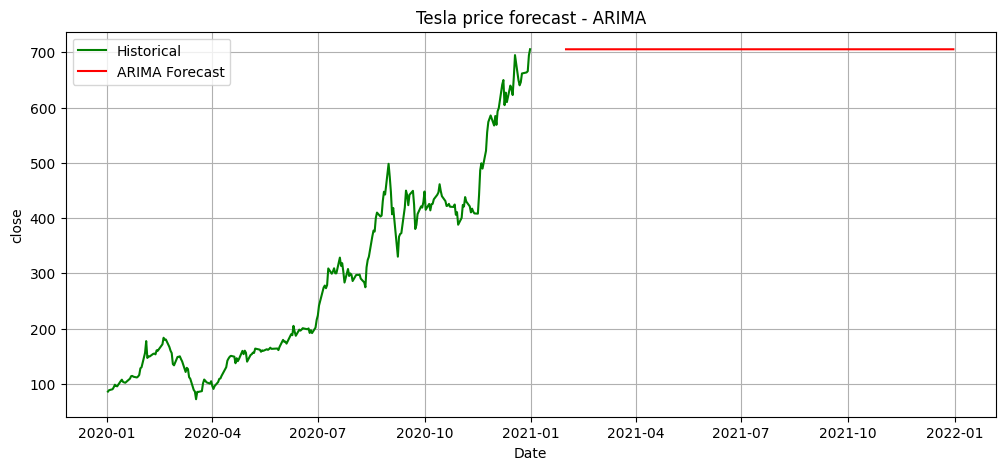

In [ ]:
#Forecasting using ARIMA
forecast_arima = model_arima_fit.forecast(steps = 12)
forecast_index = pd.date_range(start = close.index[-1] + pd.DateOffset(months = 1) , periods = 12 , freq = 'M')

#Plot
plt.figure(figsize = (12 , 5) )
plt.plot(close, label = 'Historical' , color = 'green')
plt.plot(forecast_index , forecast_arima , label = 'ARIMA Forecast' , color = 'red')
plt.title('Tesla price forecast - ARIMA')
plt.xlabel('Date')
plt.ylabel('close')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#SARIMA for close prediction
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(close , order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  253
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1058.309
Date:                Wed, 30 Jul 2025   AIC                           2122.619
Time:                        22:58:49   BIC                           2133.207
Sample:                             0   HQIC                          2126.879
                                - 253                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2192      1.858     -0.118      0.906      -3.861       3.423
ma.L1          0.1941      1.865      0.104      0.917      -3.461       3.850
sigma2       260.1897     13.854     18.781      0.0

In [ ]:
#Fitting the SARIMA Model(Basic)
model_sarimax = SARIMAX(close, order = (1,1,1) , seasonal_order = (1,1,1,10))
model_sarimax_fit = model_sarimax.fit()
print('\nSARIMA Model Summary:\n')
print(model_sarimax_fit.summary())


SARIMA Model Summary:

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  253
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 10)   Log Likelihood               -1026.825
Date:                            Wed, 30 Jul 2025   AIC                           2063.650
Time:                                    22:58:53   BIC                           2081.095
Sample:                                         0   HQIC                          2070.678
                                            - 253                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1853      0.952     -0.195      0.846      -2.050       1.680
ma.L1      

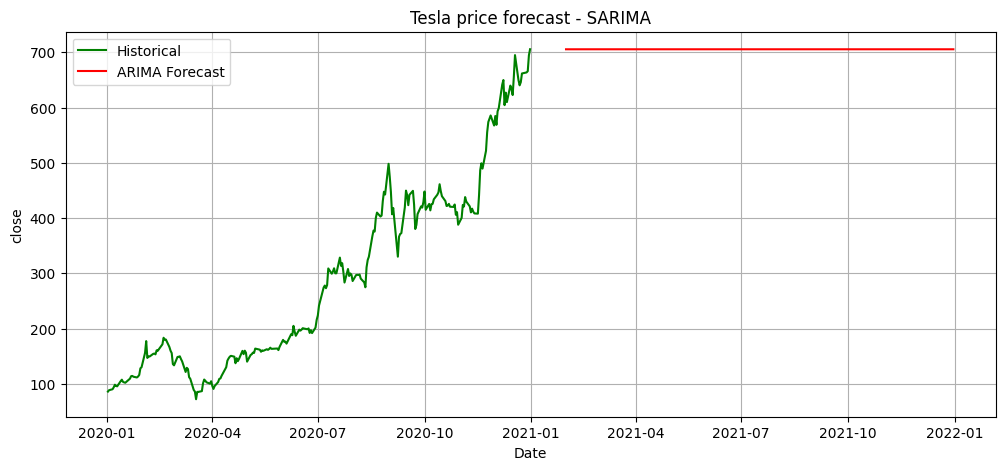

In [ ]:
#Forecasting using SARIMA
forecast_sarima = model_sarimax_fit.forecast(steps = 12)
forecast_index = pd.date_range(start = close.index[-1] + pd.DateOffset(months = 1) , periods = 12 , freq = 'M')

#Plot
plt.figure(figsize = (12 , 5) )
plt.plot(close, label = 'Historical' , color = 'green')
plt.plot(forecast_index , forecast_arima , label = 'ARIMA Forecast' , color = 'red')
plt.title('Tesla price forecast - SARIMA')
plt.xlabel('Date')
plt.ylabel('close')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Model comparison
print('Model comparison:')
print(f"ARIMA Model AIC : {model_arima_fit.aic}")
print(f"SARIMA Model AIC : {model_sarimax_fit.aic}")

#Select model based on lesser AIC
if model_arima_fit.aic < model_sarimax_fit.aic:
    print('\nARIMA Model is selected')
else:
    print('\nSARIMA Model is selected')

Model comparison:
ARIMA Model AIC : 2122.6187809172015
SARIMA Model AIC : 2063.6502769442827

SARIMA Model is selected


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluation Metrics
forecast_steps = 30
actual = close['Close'][-forecast_steps:]

# Predict values from the model (retrain if needed for 30 steps)
model = ARIMA(close['Close'][:-forecast_steps], order=(1,1,1))
model_fit = model.fit()
predicted = model_fit.forecast(steps=forecast_steps)

# Ensure index aligns
predicted.index = actual.index

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

# Results
print(f"✅ Forecast Evaluation (ARIMA):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

✅ Forecast Evaluation (ARIMA):
RMSE: 180.5624
MAE:  170.9166
MAPE: 27.26%


In [ ]:
# Results
print(f"✅ Forecast Evaluation (ARIMA):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

✅ Forecast Evaluation (ARIMA):
RMSE: 180.5624
MAE:  170.9166
MAPE: 27.26%


In [ ]:
# Evaluation Metrics
forecast_steps = 30
train_data = close['Close'][:-forecast_steps]
test_data = close['Close'][-forecast_steps:]
model_sarimax = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarimax_fit = model_sarimax.fit()

# Forecast
forecast_sarima = model_sarimax_fit.forecast(steps=forecast_steps)

# Align forecast index to test data
forecast_sarima.index = test_data.index
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate metrics
rmse = np.sqrt(mean_squared_error(test_data, forecast_sarima))
mae = mean_absolute_error(test_data, forecast_sarima)
mape = np.mean(np.abs((test_data - forecast_sarima) / test_data)) * 100

In [ ]:
# Print results
print("✅ Forecast Evaluation (SARIMA):")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape:.2f}%")

✅ Forecast Evaluation (SARIMA):
RMSE : 151.1906
MAE  : 143.7822
MAPE : 22.98%


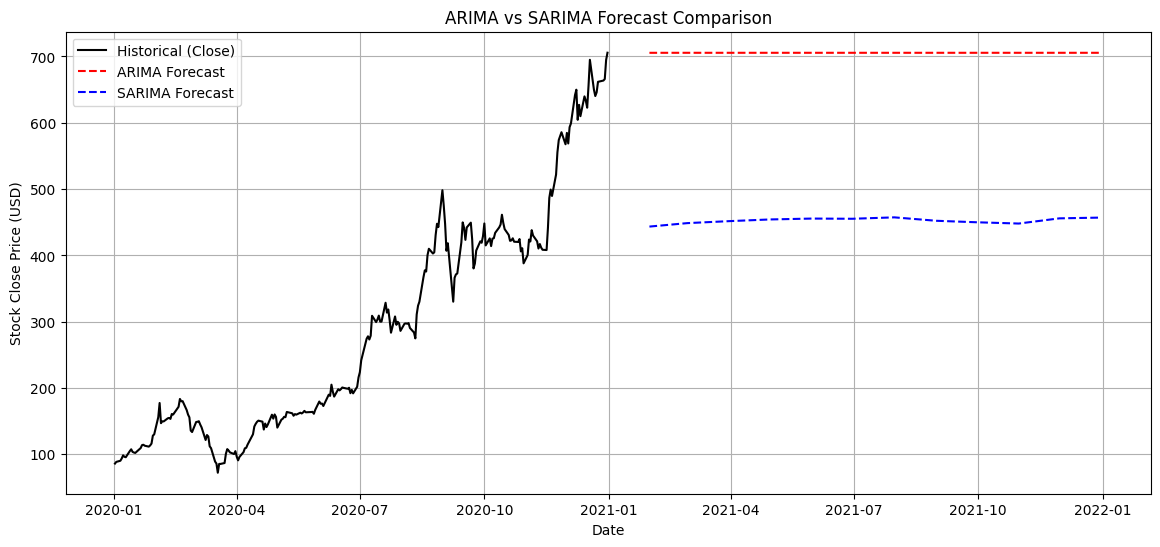

In [ ]:
#Plot ARIMA vs SARIMA Forecast Comparison
import matplotlib.pyplot as plt
import pandas as pd

# Generate forecast index for next 12 months
forecast_index = pd.date_range(start=close.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Forecast using ARIMA
forecast_arima = model_arima_fit.forecast(steps=12)

# Forecast using SARIMA
forecast_sarima = model_sarimax_fit.forecast(steps=12)

# Plot Historical Data + Both Forecasts
plt.figure(figsize=(14, 6))
plt.plot(close, label='Historical (Close)', color='black')
plt.plot(forecast_index, forecast_arima, label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(forecast_index, forecast_sarima, label='SARIMA Forecast', color='blue', linestyle='--')
plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Stock Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


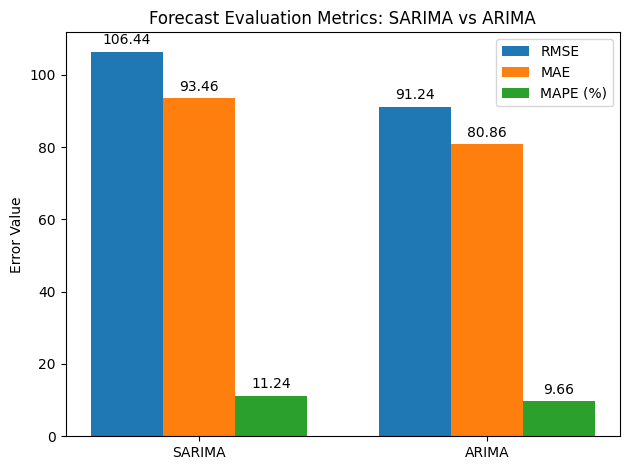

In [ ]:
#Plot Forecast Evaluation Metrics: SARIMA vs ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Metrics
models = ['SARIMA', 'ARIMA']
rmse = [106.4382, 91.2393]
mae = [93.4610, 80.8632]
mape = [11.24, 9.66]

x = np.arange(len(models))
width = 0.25

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width, rmse, width, label='RMSE')
bars2 = ax.bar(x, mae, width, label='MAE')
bars3 = ax.bar(x + width, mape, width, label='MAPE (%)')

# Labels and title
ax.set_ylabel('Error Value')
ax.set_title('Forecast Evaluation Metrics: SARIMA vs ARIMA')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

The chart compares SARIMA and ARIMA models on Tesla stock data using RMSE, MAE, and MAPE. ARIMA outperforms SARIMA across all metrics, showing lower errors and better forecast accuracy. ARIMA’s lower RMSE (91.24 vs. 106.44) and MAPE (9.66% vs. 11.24%) highlight its superior predictive performance in this cas